In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ashmi\Downloads\flipkard.csv")

# basic data understanding and missing value analysis

In [3]:
df.shape

(80000, 25)

In [4]:
df.head()

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,weight_g,warranty_months,color,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,1.9,...,3038.23,36,Green,XL,30,True,"COD,CARD",3483.592454,6.78,3.28
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,3.2,...,1921.82,0,Grey,One Size,7,True,"UPI,CARD",2091.473835,50.78,3.42
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,4.4,...,1143.49,12,Black,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,2.8,...,3644.81,24,Black,L,0,False,"CARD,Wallet",3891.222716,1.38,3.45
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,3.7,...,310.33,0,Blue,NaN,30,True,"CARD,Wallet",386.061014,79.27,4.90


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          80000 non-null  object 
 1   product_name        80000 non-null  object 
 2   category            80000 non-null  object 
 3   brand               80000 non-null  object 
 4   seller              80000 non-null  object 
 5   seller_city         80000 non-null  object 
 6   price               80000 non-null  float64
 7   discount_percent    80000 non-null  int64  
 8   final_price         80000 non-null  float64
 9   rating              80000 non-null  float64
 10  review_count        80000 non-null  int64  
 11  stock_available     80000 non-null  int64  
 12  units_sold          80000 non-null  int64  
 13  listing_date        80000 non-null  object 
 14  delivery_days       80000 non-null  int64  
 15  weight_g            80000 non-null  float64
 16  warr

In [7]:
df.isnull().sum() # empty values ke liye

product_id                0
product_name              0
category                  0
brand                     0
seller                    0
seller_city               0
price                     0
discount_percent          0
final_price               0
rating                    0
review_count              0
stock_available           0
units_sold                0
listing_date              0
delivery_days             0
weight_g                  0
warranty_months           0
color                     0
size                  13484
return_policy_days        0
is_returnable             0
payment_modes             0
shipping_weight_g         0
product_score             0
seller_rating             0
dtype: int64

In [8]:
df.describe()

,price,discount_percent,final_price,rating,review_count,stock_available,units_sold,delivery_days,weight_g,warranty_months,return_policy_days,shipping_weight_g,product_score,seller_rating
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000
mean,30137.256454,21.350625,23697.780600,2.999671,25102.249875,499.194262,2507.515775,6.006325,2522.224622,15.56400,12.362250,2899.960047,50.673750,4.002218
std,17274.048682,16.354446,14726.821259,1.156238,14428.769942,288.917706,1439.519972,3.160630,1428.287966,12.91307,10.019794,1650.921766,28.562732,0.577595
min,200.140000,0.000000,101.080000,1.000000,0.000000,0.000000,0.000000,1.000000,50.020000,0.00000,0.000000,53.155250,1.000000,3.000000
25%,15180.205000,10.000000,11341.722500,2.000000,12605.000000,249.000000,1261.000000,3.000000,1283.117500,6.00000,7.000000,1469.583781,25.950000,3.500000
50%,30164.455000,20.000000,22571.265000,3.000000,25166.500000,499.000000,2513.000000,6.000000,2524.550000,12.00000,10.000000,2892.632503,50.670000,4.010000
75%,45077.087500,40.000000,34521.057500,4.000000,37666.000000,749.000000,3754.000000,9.000000,3753.195000,24.00000,15.000000,4304.695596,75.430000,4.500000
max,59995.800000,50.000000,59995.800000,5.000000,49999.000000,999.000000,4999.000000,11.000000,4999.920000,36.00000,30.000000,6234.757448,100.000000,5.000000


# univariate analysis (single variable)


# A.) Price distribution

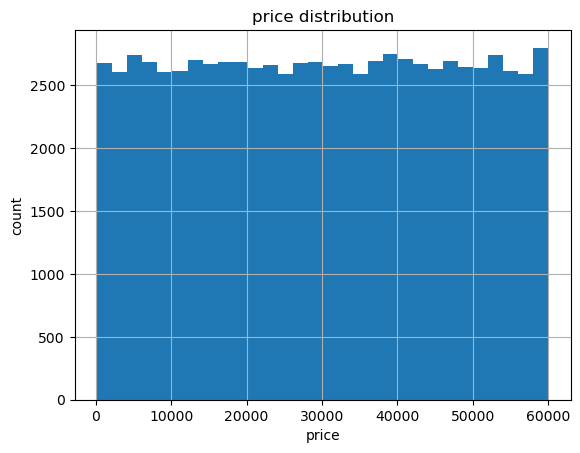

In [9]:
df['price'].hist(bins=30)
plt.xlabel('price')
plt.ylabel('count')
plt.title('price distribution')
plt.show()

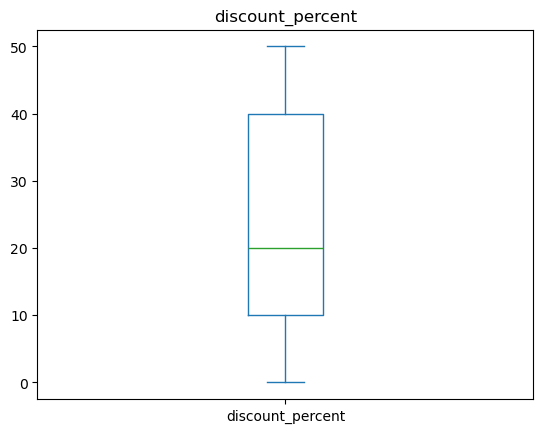

In [10]:
df['discount_percent'].plot(kind='box')
plt.title('discount_percent')
plt.show()


Text(0.5, 1.0, 'rating count')

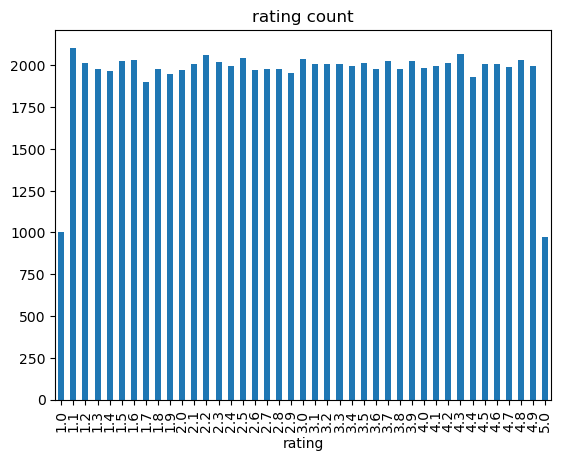

In [11]:
#Product Ratings Distribution
df['rating']=df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('rating count')

# Category & Brand Analysis

In [12]:
#Products per Category
df['category'].value_counts()

category
Toys              10151
Beauty            10094
Fashion           10080
Electronics       10052
Sports             9985
Appliances         9971
Mobiles            9904
Home & Kitchen     9763
Name: count, dtype: int64

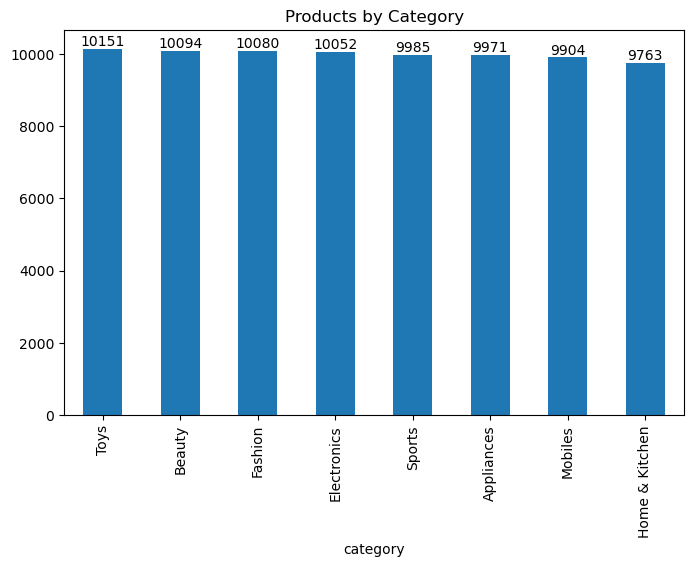

In [13]:
 dx = df['category'].value_counts().plot(kind='bar',figsize=(8,5))
for  i in dx.containers:
    dx.bar_label(i)
plt.title('Products by Category')
plt.show()

In [14]:
#Average Price by Category
df.groupby('category')['final_price'].mean().sort_values(ascending=False)

category
Beauty            23875.483863
Sports            23829.453559
Fashion           23763.412782
Home & Kitchen    23713.549375
Toys              23692.241996
Mobiles           23646.457829
Electronics       23621.011895
Appliances        23438.246744
Name: final_price, dtype: float64

<Axes: xlabel='category'>

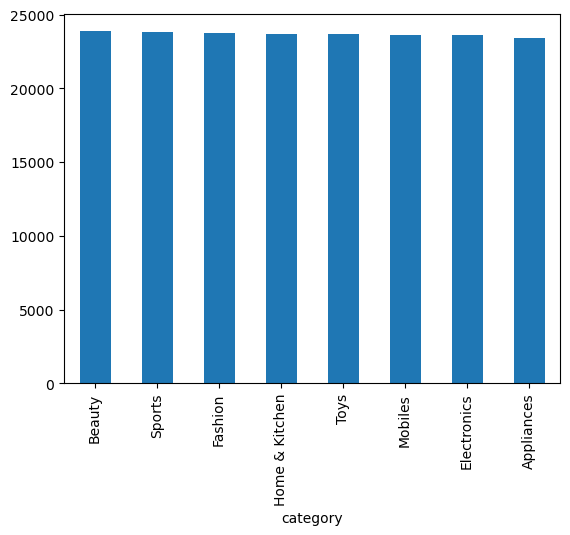

In [15]:
df.groupby('category')['final_price'].mean().sort_values(ascending=False).plot(kind=('bar'))

In [16]:
df.head()

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,weight_g,warranty_months,color,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,"Axes(0.125,0.11;0.775x0.77)",...,3038.23,36,Green,XL,30,True,"COD,CARD",3483.592454,6.78,3.28
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,"Axes(0.125,0.11;0.775x0.77)",...,1921.82,0,Grey,One Size,7,True,"UPI,CARD",2091.473835,50.78,3.42
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,"Axes(0.125,0.11;0.775x0.77)",...,1143.49,12,Black,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,"Axes(0.125,0.11;0.775x0.77)",...,3644.81,24,Black,L,0,False,"CARD,Wallet",3891.222716,1.38,3.45
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,"Axes(0.125,0.11;0.775x0.77)",...,310.33,0,Blue,NaN,30,True,"CARD,Wallet",386.061014,79.27,4.90


In [17]:
df['discount_amount']=df['price']-df['final_price']

In [18]:
df.head()

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,warranty_months,color,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating,discount_amount
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,"Axes(0.125,0.11;0.775x0.77)",...,36,Green,XL,30,True,"COD,CARD",3483.592454,6.78,3.28,5332.10
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,"Axes(0.125,0.11;0.775x0.77)",...,0,Grey,One Size,7,True,"UPI,CARD",2091.473835,50.78,3.42,3069.38
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,"Axes(0.125,0.11;0.775x0.77)",...,12,Black,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23,20485.80
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,"Axes(0.125,0.11;0.775x0.77)",...,24,Black,L,0,False,"CARD,Wallet",3891.222716,1.38,3.45,9950.55
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,"Axes(0.125,0.11;0.775x0.77)",...,0,Blue,NaN,30,True,"CARD,Wallet",386.061014,79.27,4.90,0.00


In [19]:
#Categories with Highest Discounts
df.groupby('category')['discount_percent'].mean().sort_values(ascending=False)

category
Toys              21.482120
Mobiles           21.471123
Electronics       21.432551
Appliances        21.377996
Home & Kitchen    21.346410
Beauty            21.315633
Fashion           21.226190
Sports            21.152729
Name: discount_percent, dtype: float64

Text(0, 0.5, 'higest discounts')

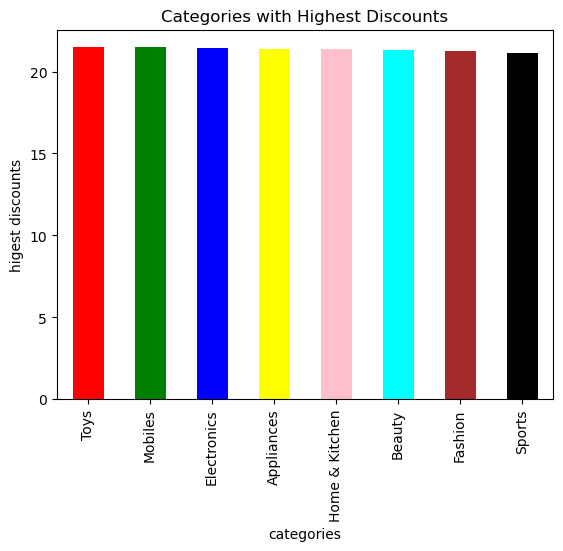

In [20]:
df.groupby('category')['discount_percent'].mean().sort_values(ascending=False).plot(kind='bar',color=['red','green','blue','yellow','pink','cyan','brown','black'])
plt.title('Categories with Highest Discounts')
plt.xlabel('categories')
plt.ylabel('higest discounts')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          80000 non-null  object 
 1   product_name        80000 non-null  object 
 2   category            80000 non-null  object 
 3   brand               80000 non-null  object 
 4   seller              80000 non-null  object 
 5   seller_city         80000 non-null  object 
 6   price               80000 non-null  float64
 7   discount_percent    80000 non-null  int64  
 8   final_price         80000 non-null  float64
 9   rating              80000 non-null  object 
 10  review_count        80000 non-null  int64  
 11  stock_available     80000 non-null  int64  
 12  units_sold          80000 non-null  int64  
 13  listing_date        80000 non-null  object 
 14  delivery_days       80000 non-null  int64  
 15  weight_g            80000 non-null  float64
 16  warr

In [22]:
df[['discount_percent', 'rating']].dtypes


discount_percent     int64
rating              object
dtype: object

In [23]:
df['discount_percent'] = pd.to_numeric(df['discount_percent'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          80000 non-null  object 
 1   product_name        80000 non-null  object 
 2   category            80000 non-null  object 
 3   brand               80000 non-null  object 
 4   seller              80000 non-null  object 
 5   seller_city         80000 non-null  object 
 6   price               80000 non-null  float64
 7   discount_percent    80000 non-null  int64  
 8   final_price         80000 non-null  float64
 9   rating              0 non-null      float64
 10  review_count        80000 non-null  int64  
 11  stock_available     80000 non-null  int64  
 12  units_sold          80000 non-null  int64  
 13  listing_date        80000 non-null  object 
 14  delivery_days       80000 non-null  int64  
 15  weight_g            80000 non-null  float64
 16  warr

In [25]:
#does Discount Impact Ratings?
df[['discount_percent','rating']].corr()

,discount_percent,rating
discount_percent,1.0,NaN
rating,NaN,NaN


In [26]:
df.head()

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,warranty_months,color,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating,discount_amount
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,NaN,...,36,Green,XL,30,True,"COD,CARD",3483.592454,6.78,3.28,5332.10
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,NaN,...,0,Grey,One Size,7,True,"UPI,CARD",2091.473835,50.78,3.42,3069.38
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,NaN,...,12,Black,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23,20485.80
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,NaN,...,24,Black,L,0,False,"CARD,Wallet",3891.222716,1.38,3.45,9950.55
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,NaN,...,0,Blue,NaN,30,True,"CARD,Wallet",386.061014,79.27,4.90,0.00


In [27]:
df['seller'].value_counts().head(10)

seller
ValueKart       10109
SuperMart       10075
UrbanRetails    10067
MegaStore       10001
QuickShop        9985
BestBuy          9980
RetailHub        9940
SmartDeals       9843
Name: count, dtype: int64

In [28]:
df[['seller_rating', 'rating']].corr()


,seller_rating,rating
seller_rating,1.0,NaN
rating,NaN,NaN


In [29]:
df.groupby('seller_rating')['rating'].mean().sort_index(ascending=False)

seller_rating
5.00   NaN
4.99   NaN
4.98   NaN
4.97   NaN
4.96   NaN
        ..
3.04   NaN
3.03   NaN
3.02   NaN
3.01   NaN
3.00   NaN
Name: rating, Length: 201, dtype: float64

<Axes: xlabel='seller'>

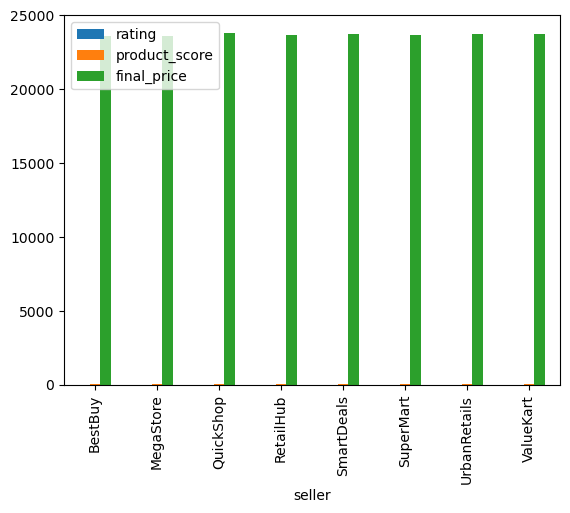

In [30]:
df.groupby('seller').agg({'rating':'mean',
                          'product_score':'mean',
                          'final_price':'mean'}).sort_values(by='rating',ascending=False).head(10).plot(kind='bar')



In [31]:
df.head()

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,warranty_months,color,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating,discount_amount
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,NaN,...,36,Green,XL,30,True,"COD,CARD",3483.592454,6.78,3.28,5332.10
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,NaN,...,0,Grey,One Size,7,True,"UPI,CARD",2091.473835,50.78,3.42,3069.38
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,NaN,...,12,Black,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23,20485.80
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,NaN,...,24,Black,L,0,False,"CARD,Wallet",3891.222716,1.38,3.45,9950.55
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,NaN,...,0,Blue,NaN,30,True,"CARD,Wallet",386.061014,79.27,4.90,0.00


In [32]:
df[['shipping_weight_g', 'rating']].corr()


,shipping_weight_g,rating
shipping_weight_g,1.0,NaN
rating,NaN,NaN


In [33]:
df['is_returnable'].value_counts(normalize=True)*100


is_returnable
True     80.0425
False    19.9575
Name: proportion, dtype: float64

In [34]:
df.groupby('is_returnable')['rating'].mean()


is_returnable
False   NaN
True    NaN
Name: rating, dtype: float64

In [35]:
df.head()

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,warranty_months,color,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating,discount_amount
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,NaN,...,36,Green,XL,30,True,"COD,CARD",3483.592454,6.78,3.28,5332.10
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,NaN,...,0,Grey,One Size,7,True,"UPI,CARD",2091.473835,50.78,3.42,3069.38
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,NaN,...,12,Black,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23,20485.80
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,NaN,...,24,Black,L,0,False,"CARD,Wallet",3891.222716,1.38,3.45,9950.55
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,NaN,...,0,Blue,NaN,30,True,"CARD,Wallet",386.061014,79.27,4.90,0.00


In [36]:
df['has_cod']=df['payment_modes'].str.contains('COD')
df.groupby('has_cod')['rating'].mean()

has_cod
False   NaN
True    NaN
Name: rating, dtype: float64

In [37]:
df.head()

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,color,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating,discount_amount,has_cod
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,NaN,...,Green,XL,30,True,"COD,CARD",3483.592454,6.78,3.28,5332.10,True
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,NaN,...,Grey,One Size,7,True,"UPI,CARD",2091.473835,50.78,3.42,3069.38,False
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,NaN,...,Black,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23,20485.80,True
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,NaN,...,Black,L,0,False,"CARD,Wallet",3891.222716,1.38,3.45,9950.55,False
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,NaN,...,Blue,NaN,30,True,"CARD,Wallet",386.061014,79.27,4.90,0.00,False


In [38]:
df[['price', 'discount_percent', 'rating', 'seller_rating',
    'shipping_weight_g', 'product_score']].corr()


,price,discount_percent,rating,seller_rating,shipping_weight_g,product_score
price,1.000000,0.001764,NaN,0.003173,-0.000575,-0.000966
discount_percent,0.001764,1.000000,NaN,-0.001854,-0.001110,0.004253
rating,NaN,NaN,NaN,NaN,NaN,NaN
seller_rating,0.003173,-0.001854,NaN,1.000000,-0.002284,-0.003419
shipping_weight_g,-0.000575,-0.001110,NaN,-0.002284,1.000000,-0.003994
product_score,-0.000966,0.004253,NaN,-0.003419,-0.003994,1.000000


In [39]:
high_value = df[
    (df['seller_rating'] >= 4) &
    (df['discount_percent'] >= 20)
]

high_value.head()
 

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,color,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating,discount_amount,has_cod
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,NaN,...,Black,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23,20485.80,True
10,FKP0000011,Samsung Ultra 702,Home & Kitchen,Samsung,SuperMart,Delhi,35385.77,50,17692.88,NaN,...,Silver,M,0,False,"COD,CARD",2647.579570,4.69,4.28,17692.89,True
14,FKP0000015,Prestige Prime 99,Appliances,Prestige,MegaStore,Bengaluru,52728.69,20,42182.95,NaN,...,Blue,M,7,True,"CARD,Wallet",1098.972604,98.98,4.39,10545.74,False
21,FKP0000022,Dell Prime 248,Beauty,Dell,BestBuy,Hyderabad,45477.31,40,27286.39,NaN,...,Silver,M,10,True,"COD,UPI,CARD",5059.939874,91.11,4.63,18190.92,True
26,FKP0000027,Sony Series 213,Sports,Sony,SuperMart,Mumbai,40502.21,30,28351.55,NaN,...,Black,S,7,True,"COD,CARD",1070.009438,96.34,4.75,12150.66,True


# Pricing & Discount Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   product_id          80000 non-null  object  
 1   product_name        80000 non-null  object  
 2   category            80000 non-null  object  
 3   brand               80000 non-null  object  
 4   seller              80000 non-null  object  
 5   seller_city         80000 non-null  object  
 6   price               80000 non-null  float64 
 7   discount_percent    80000 non-null  int64   
 8   final_price         80000 non-null  float64 
 9   rating              0 non-null      float64 
 10  review_count        80000 non-null  int64   
 11  stock_available     80000 non-null  int64   
 12  units_sold          80000 non-null  int64   
 13  listing_date        80000 non-null  object  
 14  delivery_days       80000 non-null  int64   
 15  weight_g            80000 non-null  

In [42]:
df.head(10)

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating,discount_amount,has_cod,price_range
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,NaN,...,XL,30,True,"COD,CARD",3483.592454,6.78,3.28,5332.10,True,"(24058.968, 36037.912]"
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,NaN,...,One Size,7,True,"UPI,CARD",2091.473835,50.78,3.42,3069.38,False,"(24058.968, 36037.912]"
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,NaN,...,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23,20485.80,True,"(24058.968, 36037.912]"
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,NaN,...,L,0,False,"CARD,Wallet",3891.222716,1.38,3.45,9950.55,False,"(12080.024, 24058.968]"
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,NaN,...,NaN,30,True,"CARD,Wallet",386.061014,79.27,4.90,0.00,False,"(12080.024, 24058.968]"
5,FKP0000006,Puma Series 260,Appliances,Puma,SmartDeals,Hyderabad,18608.77,10,16747.89,NaN,...,NaN,7,True,"COD,UPI,CARD",533.239119,46.84,3.44,1860.88,True,"(12080.024, 24058.968]"
6,FKP0000007,Nike Ultra 238,Beauty,Nike,ValueKart,Kolkata,6814.87,40,4088.92,NaN,...,NaN,15,True,"COD,CARD",3318.008511,14.48,3.08,2725.95,True,"(41.185, 12080.024]"
7,FKP0000008,Philips Series 152,Beauty,Philips,SuperMart,Chennai,9330.32,5,8863.80,NaN,...,L,30,True,"UPI,CARD",1833.289044,36.64,4.95,466.52,False,"(41.185, 12080.024]"
8,FKP0000009,Whirlpool Model 764,Toys,Whirlpool,MegaStore,Chennai,26866.61,30,18806.63,NaN,...,NaN,7,True,"COD,CARD",999.695736,8.17,3.96,8059.98,True,"(12080.024, 24058.968]"
9,FKP0000010,Philips Prime 114,Electronics,Philips,BestBuy,Bengaluru,53392.85,15,45383.92,NaN,...,S,10,True,"UPI,CARD",355.641359,64.93,4.66,8008.93,False,"(36037.912, 48016.856]"


In [43]:
# 1 Which price range has the most products?
df['price_range'] = pd.cut(df['final_price'], bins=5)
df['price_range'].value_counts()


price_range
(12080.024, 24058.968]    21357
(41.185, 12080.024]       21340
(24058.968, 36037.912]    19397
(36037.912, 48016.856]    12637
(48016.856, 59995.8]       5269
Name: count, dtype: int64

In [44]:
df[['final_price', 'rating']].dropna().corr()


,final_price,rating
final_price,NaN,NaN
rating,NaN,NaN
